# Seaborn
- Seaborn is a popular Python data visualization library built on top of Matplotlib
- It is specifically designed for creating attractive, informative, and statistically meaningful visualizations
- Seaborn simplifies the process of creating complex statistical plots by providing a high-level interface to Matplotlib and integrating tightly with Pandas data structures
- To install Seaborn using conda
  - conda install -c anaconda seaborn

In [1]:
# To use Seaborn and Matplotlib, we need to import them into our Python environment.
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
# Load the "diamonds" dataset
diamonds_data = sb.load_dataset("diamonds")

In [3]:
# Display the first few rows of the DataFrame
diamonds_data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
# Display the last few rows of the DataFrame
diamonds_data.tail()

,carat,cut,color,clarity,depth,table,price,x,y,z
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [5]:
# Check the shape of the dataset (number of rows and columns)
shape = diamonds_data.shape
print(f"Dataset Shape: {shape}")

Dataset Shape: (53940, 10)


In [6]:
# Check for missing values in the dataset
missing_values = diamonds_data.isnull().sum()
print("\nMissing Values:")
print(missing_values)


Missing Values:
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64


In [7]:
# This is a function from Seaborn that sets the default visual style and color palette for our Seaborn plots
sb.set_theme()

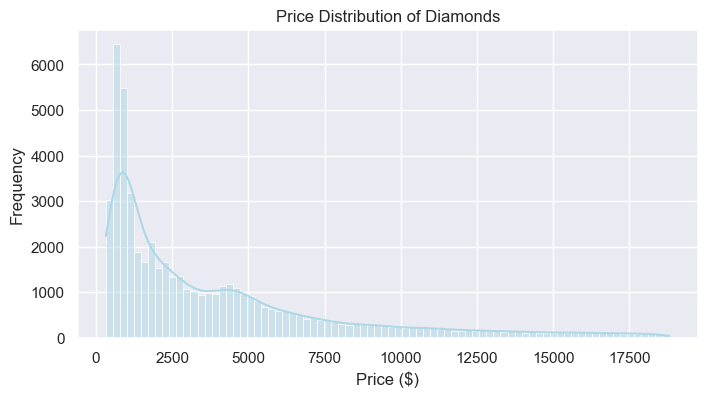

In [8]:
# Let's visualize the distribution of "price" using a histogram and kernel density plot.

# Create a histogram and kernel density plot for "price"
plt.figure(figsize=(8, 4))
sb.histplot(diamonds_data["price"], kde=True, color="lightblue")

# Customize the plot
plt.title("Price Distribution of Diamonds")
plt.xlabel("Price ($)")
plt.ylabel("Frequency")

# Display the plot
plt.show()

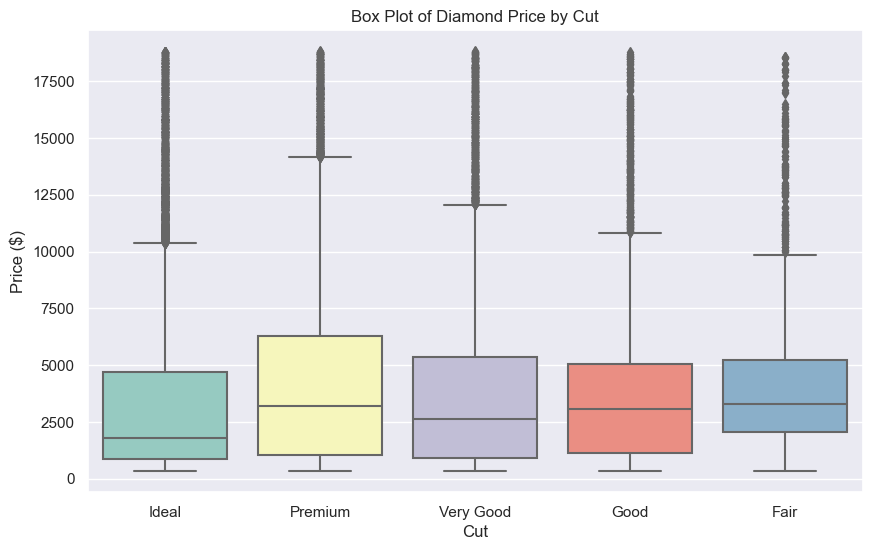

In [9]:
# Create a box plot to visualize the distribution of diamond prices for different cuts.

# Create a box plot for "cut" vs. "price"
plt.figure(figsize=(10, 6))
sb.boxplot(x="cut", y="price", data=diamonds_data, palette="Set3")

# Customize the plot
plt.title("Box Plot of Diamond Price by Cut")
plt.xlabel("Cut")
plt.ylabel("Price ($)")

# Display the plot
plt.show()

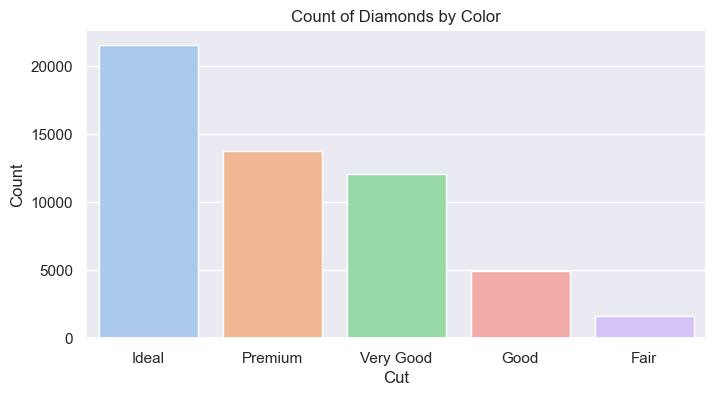

In [10]:
# Create a count plot to visualize the distribution of diamonds by color.

# Create a count plot for "color"
plt.figure(figsize=(8, 4))
sb.countplot(x="cut", data=diamonds_data, palette="pastel")

# Customize the plot
plt.title("Count of Diamonds by Color")
plt.xlabel("Cut")
plt.ylabel("Count")

# Display the plot
plt.show()

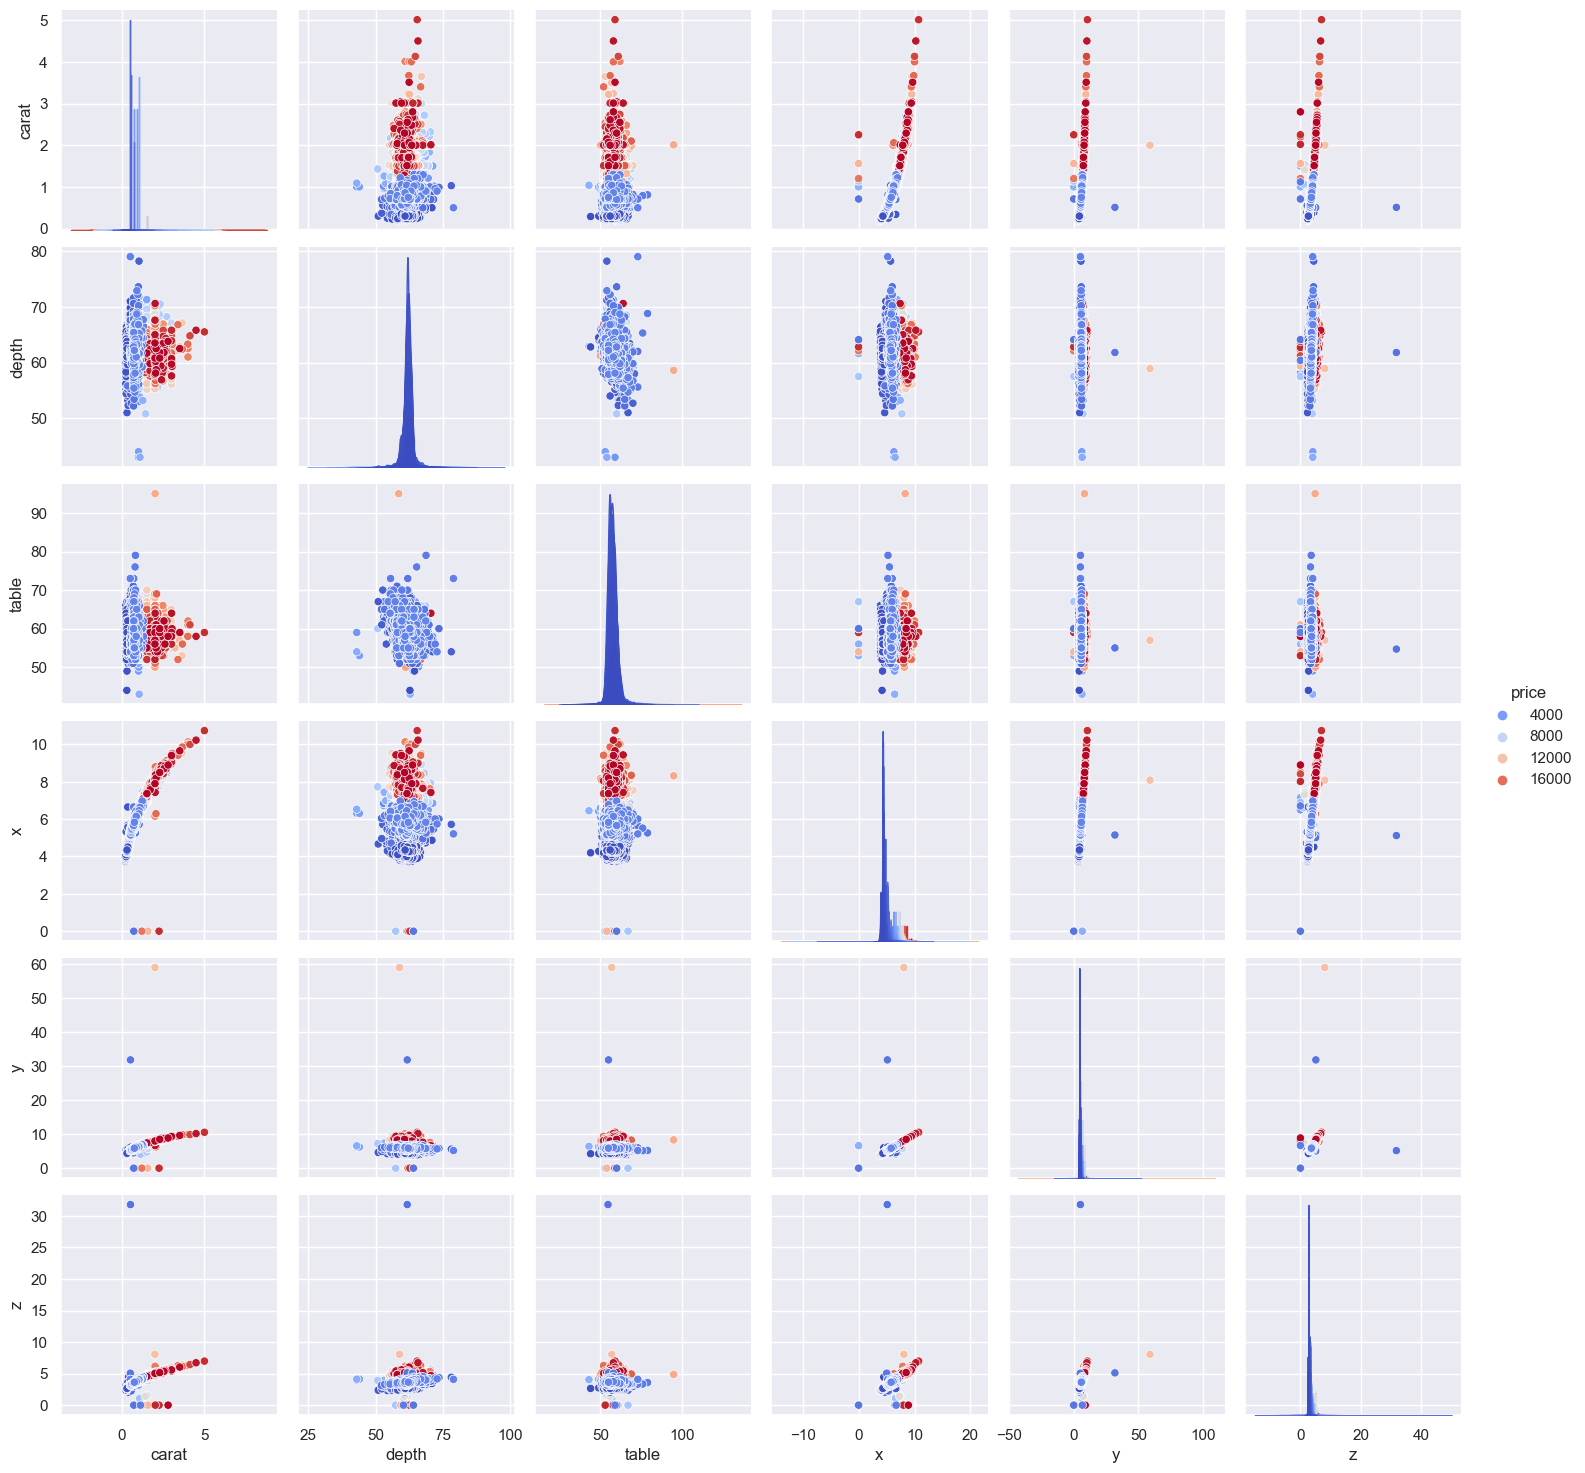

In [11]:
# Create a pair plot for numeric columns
sb.pairplot(diamonds_data, hue="price", palette="coolwarm")

# Use the first 1000 rows
# sb.pairplot(diamonds_data.loc[:999,:], hue="price", palette="coolwarm")

# Display the pair plot
plt.show()

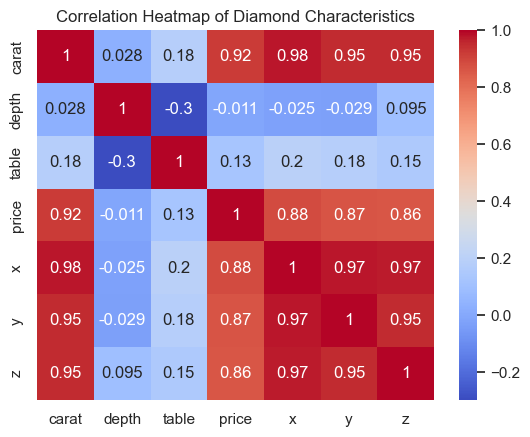

In [12]:
# Calculate the correlation matrix for the numeric columns in the dataset.
correlation_matrix = diamonds_data.drop(['cut', 'color', 'clarity'], axis=1).corr()

# Create a heatmap to visualize the correlation matrix.
# annot=True: When annot is set to True, it adds the actual data values as text annotations in each cell of the heatmap
# cmap="coolwarm": This parameter specifies the color palette used for the heatmap
sb.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

# Customize the plot
plt.title("Correlation Heatmap of Diamond Characteristics")
plt.show()

### Beautify heatmap

In [13]:
import numpy as np

# ones_like can build a matrix of booleans (True, False) with the same shape as our data
ones_corr = np.ones_like(correlation_matrix, dtype=bool)

# The variable mask now contains the upper triangular matrix mask created in the previous step
mask = np.triu(ones_corr)
print(mask)

[[ True  True  True  True  True  True  True]
 [False  True  True  True  True  True  True]
 [False False  True  True  True  True  True]
 [False False False  True  True  True  True]
 [False False False False  True  True  True]
 [False False False False False  True  True]
 [False False False False False False  True]]


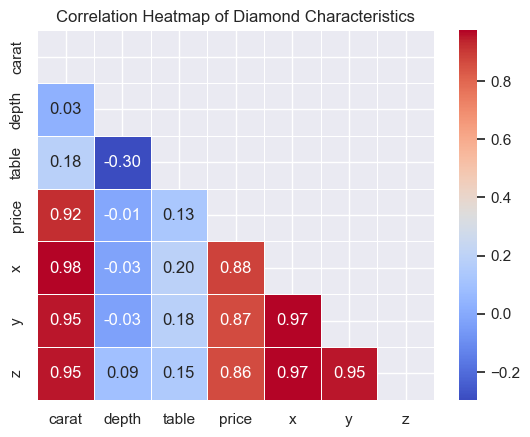

In [14]:
# Create a heatmap to visualize the correlation matrix.
# fmt=".2f": The fmt parameter specifies the format of the annotations in the heatmap.
# linecolor='white': This parameter sets the color of the lines that separate the individual cells in the heatmap
# linewidths=0.5: The linewidths parameter controls the width of the lines that separate the cells
sb.heatmap(correlation_matrix, mask=mask, annot=True, cmap="coolwarm", fmt=".2f", linecolor='white', linewidths=0.5)

# Customize the plot
plt.title("Correlation Heatmap of Diamond Characteristics")
plt.show()

<Figure size 800x600 with 0 Axes>

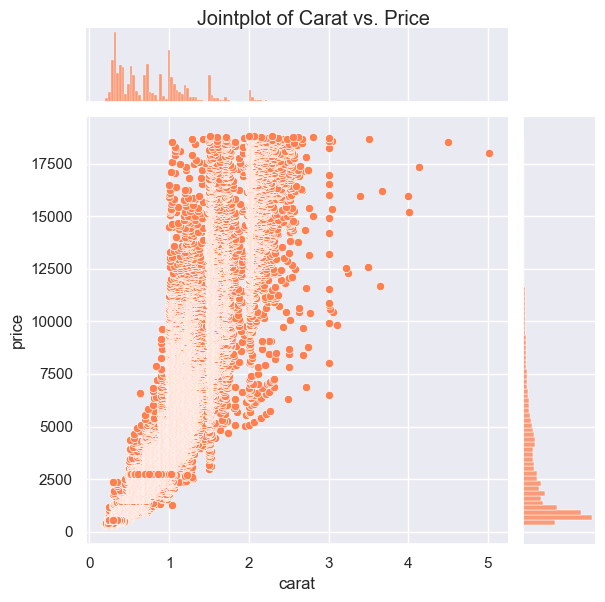

In [15]:
# Create a jointplot to visualize the relationship between "carat" and "price."
plt.figure(figsize=(8, 6))
sb.jointplot(x="carat", y="price", data=diamonds_data, color="coral")

# Customize the plot
plt.suptitle("Jointplot of Carat vs. Price", y=1)
plt.show()

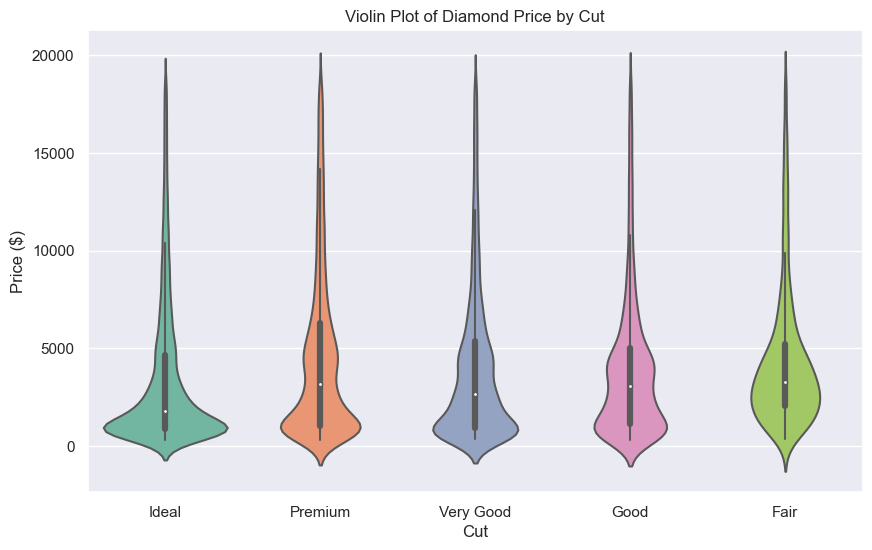

In [16]:
# A violin plot is a data visualization that combines aspects of a box plot and a kernel density plot
# It is used to display the distribution of a dataset, providing insights into the data's central tendency, spread, and skewness

# Create a violin plot for "color" vs. "price"
plt.figure(figsize=(10, 6))
sb.violinplot(x="cut", y="price", data=diamonds_data, palette="Set2")

# Customize the plot
plt.title("Violin Plot of Diamond Price by Cut")
plt.xlabel("Cut")
plt.ylabel("Price ($)")

# Display the plot
plt.show()